# **1.Tratamiento de Datos**

## **Subir Datos Limpios Del Anterior Proyecto**

In [1]:
import pandas as pd

# Cargar el archivo CSV limpio
df = pd.read_csv('telecomx_datos_limpios.csv')

# Vista rápida
print(df.shape)
print(df.columns)
df.head()


(7043, 23)
Index(['ID_Cliente', 'Churn', 'Genero', 'EsAdultoMayor', 'TienePareja',
       'TieneDependientes', 'MesesDeAntiguedad', 'TieneTelefono',
       'MultiplesLineas', 'TipoInternet', 'SeguridadOnline', 'RespaldoOnline',
       'ProteccionDispositivo', 'SoporteTecnico', 'TV_Streaming',
       'Peliculas_Streaming', 'TipoContrato', 'FacturacionOnline',
       'MetodoPago', 'FacturacionMensual', 'FacturacionTotal',
       'Cuentas_Diarias', 'TotalServicios'],
      dtype='object')


,ID_Cliente,Churn,Genero,EsAdultoMayor,TienePareja,TieneDependientes,MesesDeAntiguedad,TieneTelefono,MultiplesLineas,TipoInternet,...,SoporteTecnico,TV_Streaming,Peliculas_Streaming,TipoContrato,FacturacionOnline,MetodoPago,FacturacionMensual,FacturacionTotal,Cuentas_Diarias,TotalServicios
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667,4
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,3
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,2
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,5
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,3


## **Limpieza de datos irrelevantes**

In [2]:
# Copia de trabajo
df_model = df.copy()

# Eliminar columnas irrelevantes
columnas_a_eliminar = ['ID_Cliente', 'Cuentas_Diarias', 'FacturacionTotal']
df_model.drop(columns=columnas_a_eliminar, inplace=True)

# Verificación
print("Columnas finales:", df_model.columns.tolist())
df_model.head()


Columnas finales: ['Churn', 'Genero', 'EsAdultoMayor', 'TienePareja', 'TieneDependientes', 'MesesDeAntiguedad', 'TieneTelefono', 'MultiplesLineas', 'TipoInternet', 'SeguridadOnline', 'RespaldoOnline', 'ProteccionDispositivo', 'SoporteTecnico', 'TV_Streaming', 'Peliculas_Streaming', 'TipoContrato', 'FacturacionOnline', 'MetodoPago', 'FacturacionMensual', 'TotalServicios']


,Churn,Genero,EsAdultoMayor,TienePareja,TieneDependientes,MesesDeAntiguedad,TieneTelefono,MultiplesLineas,TipoInternet,SeguridadOnline,RespaldoOnline,ProteccionDispositivo,SoporteTecnico,TV_Streaming,Peliculas_Streaming,TipoContrato,FacturacionOnline,MetodoPago,FacturacionMensual,TotalServicios
0,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,4
1,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,3
2,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,2
3,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,5
4,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,3


## **Encoding**

In [3]:
columnas_categoricas = ['Genero', 'TipoInternet', 'TipoContrato', 'MetodoPago']


In [4]:
# Codificación One-Hot para columnas categóricas, sin la primera categoría para evitar multicolinealidad
df_model_encoded = pd.get_dummies(df_model, columns=columnas_categoricas, drop_first=True)

# Verificar columnas resultantes
print("Columnas después del encoding:", df_model_encoded.columns.tolist())
df_model_encoded.head()


Columnas después del encoding: ['Churn', 'EsAdultoMayor', 'TienePareja', 'TieneDependientes', 'MesesDeAntiguedad', 'TieneTelefono', 'MultiplesLineas', 'SeguridadOnline', 'RespaldoOnline', 'ProteccionDispositivo', 'SoporteTecnico', 'TV_Streaming', 'Peliculas_Streaming', 'FacturacionOnline', 'FacturacionMensual', 'TotalServicios', 'Genero_Male', 'TipoInternet_Fiber optic', 'TipoInternet_No', 'TipoContrato_One year', 'TipoContrato_Two year', 'MetodoPago_Credit card (automatic)', 'MetodoPago_Electronic check', 'MetodoPago_Mailed check']


,Churn,EsAdultoMayor,TienePareja,TieneDependientes,MesesDeAntiguedad,TieneTelefono,MultiplesLineas,SeguridadOnline,RespaldoOnline,ProteccionDispositivo,...,FacturacionMensual,TotalServicios,Genero_Male,TipoInternet_Fiber optic,TipoInternet_No,TipoContrato_One year,TipoContrato_Two year,MetodoPago_Credit card (automatic),MetodoPago_Electronic check,MetodoPago_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,65.6,4,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,59.9,3,True,False,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,0,1,...,73.9,2,True,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,98.0,5,True,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,83.9,3,False,True,False,False,False,False,False,True


## **Verificación de la Proporción de Cancelación (Churn)**

In [5]:
# Conteo absoluto
conteo_churn = df_model_encoded['Churn'].value_counts()

# Porcentaje
porcentaje_churn = df_model_encoded['Churn'].value_counts(normalize=True) * 100

# Mostrar resultados
print("📊 Conteo de clases en 'Churn':")
print(conteo_churn)
print("\n📈 Porcentaje de cada clase:")
print(porcentaje_churn.round(2))


📊 Conteo de clases en 'Churn':
Churn
0    5174
1    1869
Name: count, dtype: int64

📈 Porcentaje de cada clase:
Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


## **Normalización o Estandarización(Generamos df para cada caso)**

In [6]:
from sklearn.preprocessing import StandardScaler

# Variables numéricas originales
columnas_numericas = ['MesesDeAntiguedad', 'FacturacionMensual', 'TotalServicios']

# Crear copia para modelos que necesitan escalado
df_scaled = df_model_encoded.copy()

# Aplicar StandardScaler
scaler = StandardScaler()
df_scaled[columnas_numericas] = scaler.fit_transform(df_scaled[columnas_numericas])

# Verificar escalado
df_scaled[columnas_numericas].describe().round(2)


,MesesDeAntiguedad,FacturacionMensual,TotalServicios
count,7043.00,7043.00,7043.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-1.32,-1.55,-1.63
25%,-0.95,-0.97,-1.15
50%,-0.14,0.19,-0.18
75%,0.92,0.83,0.79
max,1.61,1.79,2.25


# **2.Correlacion y seleccion de variables**


## **Análisis de Correlación**

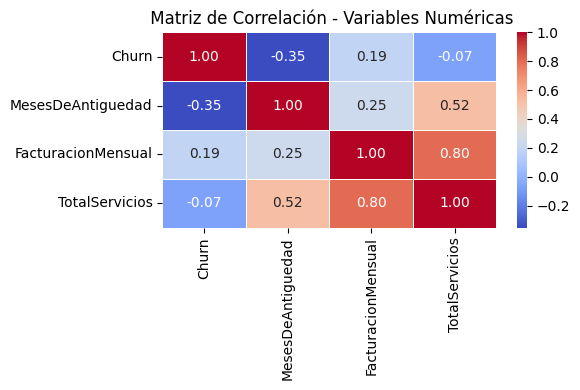

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas numéricas
numericas = ['Churn', 'MesesDeAntiguedad', 'FacturacionMensual', 'TotalServicios']

# Matriz de correlación
corr_matrix = df_scaled[numericas].corr()

# Visualizar
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(" Matriz de Correlación - Variables Numéricas")
plt.tight_layout()
plt.show()


## **Analisis Dirigido**

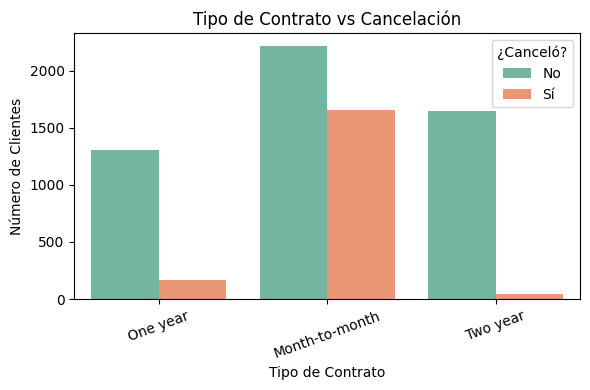

In [8]:
# Usamos el DataFrame original con columnas categóricas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df_model, x='TipoContrato', hue='Churn', palette='Set2')
plt.title("Tipo de Contrato vs Cancelación")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Número de Clientes")
plt.legend(title="¿Canceló?", labels=["No", "Sí"])
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-2928648209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='FacturacionTotal', palette='Set2')


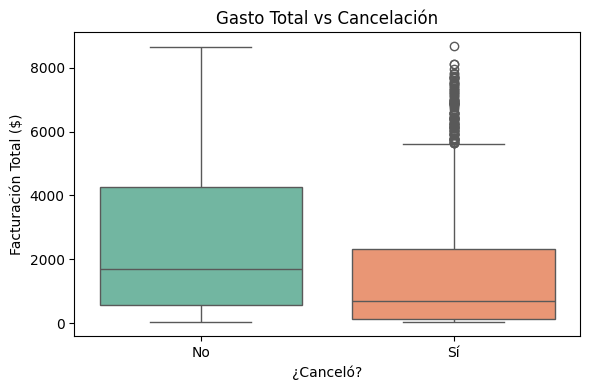

In [9]:
# Usamos el DataFrame original (no escalado) para interpretar valores reales
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='FacturacionTotal', palette='Set2')
plt.title("Gasto Total vs Cancelación")
plt.xlabel("¿Canceló?")
plt.ylabel("Facturación Total ($)")
plt.xticks([0, 1], ['No', 'Sí'])
plt.tight_layout()
plt.show()


# **3.Modelo Predictivo**

## **Separacion de datos**

In [10]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y target (y)
X = df_scaled.drop(columns=['Churn'])
y = df_scaled['Churn']

# División 80% entrenamiento / 20% prueba, con estratificación para mantener la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Confirmar tamaño de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("Distribución de clases en entrenamiento:\n", y_train.value_counts(normalize=True).round(3))


Tamaño del conjunto de entrenamiento: (5634, 23)
Tamaño del conjunto de prueba: (1409, 23)
Distribución de clases en entrenamiento:
 Churn
0    0.735
1    0.265
Name: proportion, dtype: float64


## **Creacion de modelos**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# ---------- Modelo 1: Regresión Logística (con datos normalizados) ----------
X1 = df_scaled.drop(columns=['Churn'])
y1 = df_scaled['Churn']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

# ---------- Modelo 2: Random Forest (con datos no normalizados) ----------
X2 = df_model_encoded.drop(columns=['Churn'])
y2 = df_model_encoded['Churn']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)


In [12]:
# Modelo 1: Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X1_train, y1_train)
y1_pred = logreg.predict(X1_test)
y1_prob = logreg.predict_proba(X1_test)[:, 1]

# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X2_train, y2_train)
y2_pred = rf.predict(X2_test)
y2_prob = rf.predict_proba(X2_test)[:, 1]


In [13]:
# Métricas para ambos modelos
print(" Modelo 1: Regresión Logística (con normalización)\n")
print(classification_report(y1_test, y1_pred))
print("AUC:", round(roc_auc_score(y1_test, y1_prob), 4))

print("\n Modelo 2: Random Forest (sin normalización)\n")
print(classification_report(y2_test, y2_pred))
print("AUC:", round(roc_auc_score(y2_test, y2_prob), 4))


 Modelo 1: Regresión Logística (con normalización)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

AUC: 0.8418

 Modelo 2: Random Forest (sin normalización)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1035
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409

AUC: 0.8158


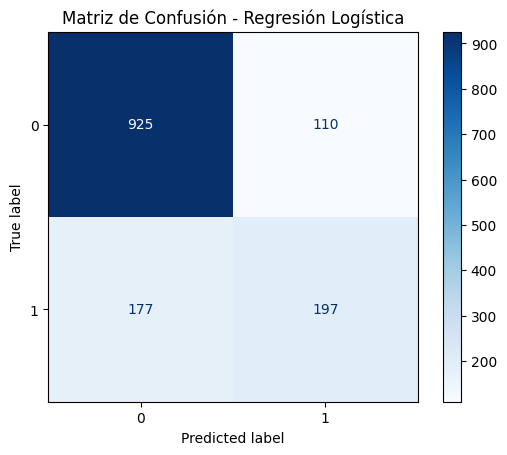

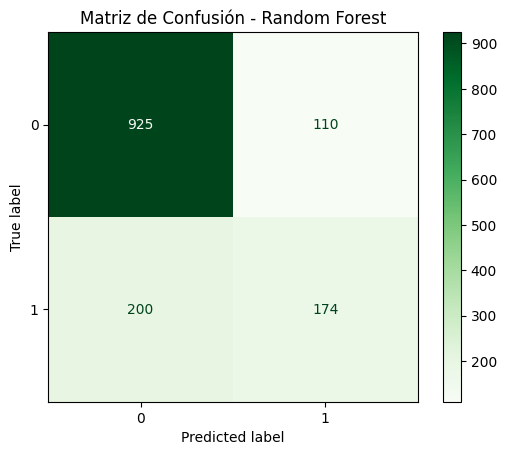

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusión Regresión Logística
ConfusionMatrixDisplay.from_estimator(logreg, X1_test, y1_test, cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# Confusión Random Forest
ConfusionMatrixDisplay.from_estimator(rf, X2_test, y2_test, cmap="Greens")
plt.title("Matriz de Confusión - Random Forest")
plt.show()


# **Interpretacion y Conclusion**

### **Regresion Logistica**

In [15]:
# Asociar coeficientes con nombres de variables
import numpy as np
import pandas as pd

coefs = pd.Series(logreg.coef_[0], index=X1.columns)
coefs_ordenados = coefs.sort_values(ascending=False)

# Mostrar los 10 más influyentes
print(" Variables con mayor influencia positiva (mayor riesgo de churn):")
print(coefs_ordenados.head(10))

print("\n Variables con mayor influencia negativa (menor riesgo de churn):")
print(coefs_ordenados.tail(10))


 Variables con mayor influencia positiva (mayor riesgo de churn):
TipoInternet_Fiber optic       0.830401
MetodoPago_Electronic check    0.405323
FacturacionOnline              0.359696
MultiplesLineas                0.270657
TV_Streaming                   0.211224
EsAdultoMayor                  0.201768
TotalServicios                 0.152340
Peliculas_Streaming            0.108484
MetodoPago_Mailed check        0.069437
FacturacionMensual             0.041890
dtype: float64

 Variables con mayor influencia negativa (menor riesgo de churn):
Genero_Male             -0.075653
TieneDependientes       -0.162587
RespaldoOnline          -0.206321
SeguridadOnline         -0.376838
SoporteTecnico          -0.466367
TieneTelefono           -0.591306
TipoContrato_One year   -0.681245
TipoInternet_No         -0.778602
MesesDeAntiguedad       -0.833929
TipoContrato_Two year   -1.297883
dtype: float64


### **RandomForest**

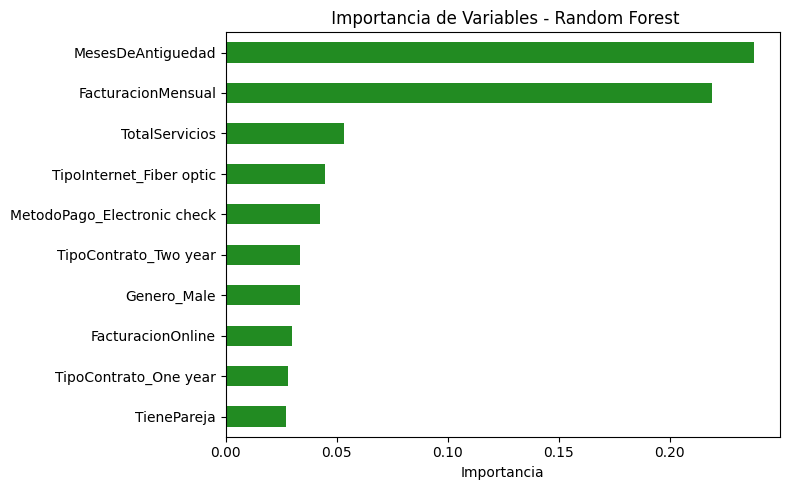

In [16]:
import matplotlib.pyplot as plt

# Obtener importancia de variables
importancias = pd.Series(rf.feature_importances_, index=X2.columns)
importancias_ordenadas = importancias.sort_values(ascending=False)

# Visualizar las 10 más importantes
plt.figure(figsize=(8, 5))
importancias_ordenadas.head(10).plot(kind='barh', color='forestgreen')
plt.gca().invert_yaxis()
plt.title(" Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

### **📊 Objetivo del Análisis**

Desarrollar modelos predictivos que permitan anticipar la cancelación de clientes en Telecom X. El objetivo es identificar los factores clave que influyen en la deserción, con el fin de que la empresa pueda actuar proactivamente y mejorar la retención.

### **📑 Preparación de los Datos**

* Se utilizó un conjunto de datos previamente tratado y limpiado.

* Se eliminaron columnas irrelevantes.

* Las variables categóricas fueron transformadas mediante One-Hot Encoding.

* Las variables numéricas fueron normalizadas para ciertos modelos sensibles a la escala.

### **📊 Exploración y Análisis**

* Desbalanceo: La proporción de cancelaciones fue del 26.5%, evidenciando un desbalance moderado.

* Matriz de correlación: Se identificó correlación negativa entre cancelación y antigüedad del cliente.

* Análisis visual:

   * Clientes con contrato mes a mes tienen mayor probabilidad de cancelar.

   * Clientes con menor facturación total y baja antigüedad también están más propensos a cancelar.

### **🧠 Modelos Entrenados**

### **Modelo 1: Regresión Logística (con normalización)**

* Accuracy: 80%

* Recall (Churn): 53%

* AUC: 0.84

* Mejores resultados en detección de clientes que cancelan.

### **Modelo 2: Random Forest (sin normalización)**

* Accuracy: 78%

* Recall (Churn): 47%

* AUC: 0.82

* Buen rendimiento general, pero menor sensibilidad para detectar churn.

### **🔢 Análisis de Variables Relevantes**

**Regresión Logística - Coeficientes:**

* Variables que aumentan el riesgo de cancelación:

  * TipoInternet_Fiber optic

  * MetodoPago_Electronic check

  * FacturacionOnline

  * MultiplesLineas

* Variables que reducen el riesgo:

  * TipoContrato_Two year

  * MesesDeAntiguedad

  * TipoInternet_No

  * TieneTelefono

**Random Forest - Importancia:**

* Variables más importantes:

  * MesesDeAntiguedad

  * FacturacionMensual

  * TotalServicios

  * TipoInternet_Fiber optic

  * MetodoPago_Electronic check

### **Conclusiones Finales**

* El modelo más efectivo para predecir cancelaciones fue la Regresión Logística, gracias a su mayor recall y capacidad discriminativa (AUC).

* Las variables más relevantes fueron la antigüedad, el tipo de contrato, el tipo de internet y el método de pago.

* Clientes nuevos, con contratos mes a mes, internet de fibra óptica y que pagan con cheques electrónicos tienen mayor probabilidad de cancelar.

### **Recomendaciones**

Fomentar contratos anuales o bianuales con incentivos.

1.   Identificar y contactar tempranamente a los clientes con bajo tiempo de permanencia y alta facturación.
2.   Revisar la experiencia de clientes que usan Fiber optic y Electronic Check para detectar posibles causas de insatisfacción.
3.   Revisar la experiencia de clientes que usan Fiber optic y Electronic Check para detectar posibles causas de insatisfacción.
4.   
En una siguiente etapa, aplicar técnicas de balanceo como SMOTE y explorar modelos como XGBoost para refinar aún más la predicción.






